# 추측통계

우리는 데이터를 분석하거나 모델링을 할 때, 모든 데이터를 수집하지 못하고 일부 데이터만을 수집해야 하는 경우가 많습니다. 이런 경우, 전체 데이터를 대표할 수 있는 통계량(예: 평균, 표준편차 등)을 계산하여 이를 기반으로 모델링이나 예측을 수행할 수 있습니다.

하지만, 일부 데이터만을 수집하게 되면 그 데이터가 모집단(population)을 대표하는 것인지 확실하지 않습니다. 

**추측통계**는 이러한 불확실성을 고려한 통계적 추정 방법입니다. 추측통계는 샘플 데이터를 기반으로 모집단의 특성을 추정하고, 이 추정 결과의 신뢰도를 파악하기 위한 방법입니다.

예를 들어, 어떤 음식점에서 매일 판매되는 음식의 가격을 조사하기 위해 1주일 동안 매일 10개씩 음식 가격을 조사하였다고 가정해봅시다. 하지만, 실제 음식 가격은 매일 조사한 값들만으로는 확실하게 파악하기 어렵습니다. 이런 경우, 추측통계를 사용하여 해당 음식점의 전체 음식 가격 분포를 추정하고, 이를 기반으로 음식 가격의 평균값, 분산 등을 계산할 수 있습니다.

따라서 추측통계는 모집단의 모든 데이터를 수집하는 것이 어려울 때, 샘플 데이터를 기반으로 모집단의 특성을 추정하고, 이 추정 결과의 신뢰도를 파악하는 데에 매우 유용한 통계적 방법입니다.

In [ ]:
# 모집단과 표본
# 표본의 추출방법

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/ch4_scores400.csv')
df.shape
scores = np.array(df.score)
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

In [ ]:
np.random.choice([1,2,3],3, replace=False) # 중복 방지

array([2, 1, 3])

In [ ]:
data = np.array([1,2,3,4,5])
p = [0.1,0.2,0.4,0.2,0.1]
sample = np.random.choice(data,size=10,replace=True,p=p) # p는 선택될 확률을 지정
print(sample)

[3 2 3 5 3 3 3 2 3 3]


In [ ]:
np.random.seed(0)
sample = np.random.choice(scores, 20)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81], dtype=int64)

In [ ]:
sample.mean()

70.4

In [ ]:
scores.mean()

69.53

In [ ]:
for i in range(5):
    sample = np.random.choice(scores,20)
    print(sample)
    print(f'{i+1}번째 무작위 추출로 얻은 표본평균', sample.mean(),'\n')

[56 55 79 91 86 79 83 55 85 76 81 57 77 99 61 57 81 73 59 59]
1번째 무작위 추출로 얻은 표본평균 72.45 

[80 50 85 86 85 59 72 58 31 60 56 64 49 88 66 63 63 47 67 45]
2번째 무작위 추출로 얻은 표본평균 63.7 

[31 55 77 61 54 57 72 46 52 76 92 63 63 80 94 70 76 61 80 61]
3번째 무작위 추출로 얻은 표본평균 66.05 

[47 60 65 86 65 74 76 60 85 78 73 70 68 86 58 74 67 67 83 92]
4번째 무작위 추출로 얻은 표본평균 71.7 

[54 73 92 81 87 56 96 57 93 67 90 54 90 75 46 80 63 57 78 94]
5번째 무작위 추출로 얻은 표본평균 74.15 



In [ ]:
dice = [1,2,3,4,5,6]
prob = [1/21,2/21,3/21,4/21,5/21,6/21]

np.random.seed(1)
num_trial = 100
sample = np.random.choice(dice ,num_trial, p=prob)
sample

array([4, 6, 1, 4, 3, 2, 3, 4, 4, 5, 4, 5, 3, 6, 1, 5, 4, 5, 2, 3, 6, 6,
       4, 5, 6, 6, 2, 1, 3, 6, 2, 4, 6, 5, 5, 4, 5, 6, 1, 6, 6, 6, 3, 6,
       2, 4, 6, 4, 4, 2, 1, 5, 3, 3, 5, 2, 5, 3, 5, 5, 2, 4, 5, 4, 2, 5,
       5, 5, 6, 5, 6, 2, 2, 6, 4, 3, 6, 4, 6, 6, 6, 5, 6, 4, 3, 6, 4, 6,
       5, 5, 2, 6, 4, 5, 4, 3, 6, 5, 1, 5])

In [ ]:
freq, _ = np.histogram(sample,bins=6,range=(1,7))
print(freq,'\n')
rdf = pd.DataFrame({'frequency':freq,
                   'relative frequency':freq/num_trial},
                  index=pd.Index(np.arange(1,7),name='dice'))
rdf

[ 6 12 12 20 24 26] 



,frequency,relative frequency
dice,,
1,6,0.06
2,12,0.12
3,12,0.12
4,20,0.20
5,24,0.24
6,26,0.26


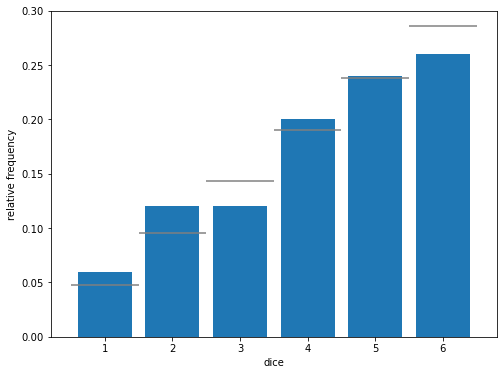

In [ ]:
# 100번 시행하여 얻은 눈의 상대도수로부터 추측된 확률분포와 실제 확률분포 사이에는 차이 발생
np.linspace(1.5,6.5,6)
np.random.seed(1)
num_trial=100
sample = np.random.choice(dice ,num_trial, p=prob)

plt.figure(figsize=(8,6))
plt.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
plt.hlines(prob,np.arange(1,7), np.arange(2,8), colors='gray')
plt.xticks(np.linspace(1.5,6.5,6),np.arange(1,7)) # x, x_labels
plt.xlabel('dice')
plt.ylabel('relative frequency')
plt.show()

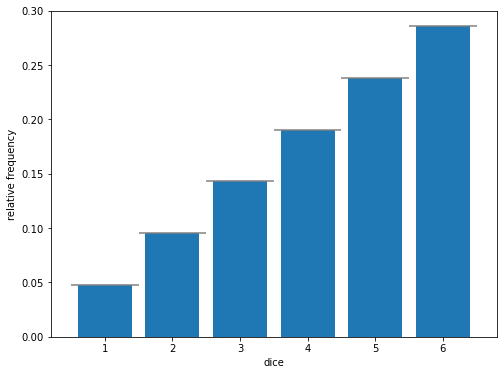

In [ ]:
# 1000000번 시행하여 얻은 눈의 상대도수로부터 추측된 확률분포는 실제 확률분포로 근접
# 시행 횟수를 늘리면 상대도수는 확률분포로 수렴된다.
np.linspace(1.5,6.5,6)
np.random.seed(1)
num_trial=1000000
sample = np.random.choice(dice ,num_trial, p=prob)

plt.figure(figsize=(8,6))
plt.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
plt.hlines(prob,np.arange(1,7), np.arange(2,8), colors='gray')
plt.xticks(np.linspace(1.5,6.5,6),np.arange(1,7)) # x, x_labels
plt.xlabel('dice')
plt.ylabel('relative frequency')
plt.show()

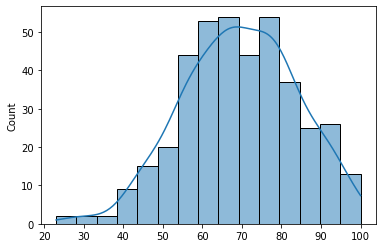

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./data/ch4_scores400.csv')
df.shape
scores = np.array(df.score)
sns.histplot(scores,kde=True)
plt.show()

In [ ]:
scores.shape

(400,)

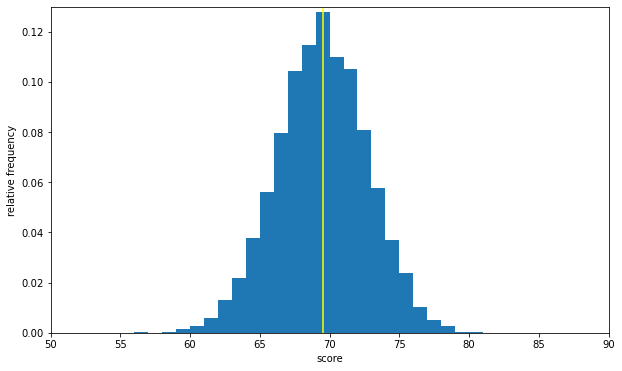

In [ ]:
# 표본평균은 모평균을 중심으로 분포하는 것을 확인
# 무작위 추출에 의한 표본평균으로 모평균을 추측할 수 있는 근거가 된다.
sample_means = [np.random.choice(scores,20).mean() for _ in range(10000)]
len(sample_means)

fig = plt.figure(figsize=(10,6))
plt.hist(sample_means, bins=100, range=(0,100), density=True)
# 모평균을 세로선으로 표시
plt.vlines(np.mean(scores),0,1,'yellow')
plt.axis([50,90,0,0.13])
plt.xlabel('score')
plt.ylabel('relative frequency')
plt.show()

## 모집단 분포와 표본분포

한 마을에 살고 있는 사람들의 키를 조사하려고 한다고 가정해봅시다. 이때 모든 사람의 키를 측정하려면 시간과 비용이 많이 들기 때문에, 일부 사람들의 키만을 측정하는 것이 일반적입니다. 이렇게 측정된 일부 사람들의 키를 바탕으로, 전체 사람들의 키를 추정하는 것이 표본조사입니다.

하지만 이렇게 측정된 일부 사람들의 키만 가지고 전체 사람들의 키를 추정하는 것은 불확실성이 큽니다. 그렇기 때문에 우리는 이 일부 사람들의 키를 뽑을 때, 랜덤하게 뽑는 것이 중요합니다. 이렇게 랜덤하게 뽑은 일부 사람들의 키를 모아서 만든 키 분포를 표본분포라고 합니다.

이 표본분포에서는 키가 어떻게 분포하는지를 알 수 있습니다. 그러나 이것만으로는 모든 사람의 키를 정확하게 추정할 수는 없습니다. 따라서 이 표본분포에서 얻은 정보를 모집단 분포와 비교하여, 모집단 분포에서의 키 분포를 예측합니다.

모집단 분포는 전체 사람들의 키 분포를 의미합니다. 이것을 정확하게 알기 위해서는 전체 사람들의 키를 모두 측정해야 합니다. 하지만 그렇게 하지 않고도, 표본분포에서 얻은 정보를 토대로 모집단 분포를 추정할 수 있습니다.

따라서, 표본분포는 일부 데이터를 기반으로 만들어진 것이고, 모집단 분포는 전체 데이터를 기반으로 만들어진 것입니다. 표본분포를 이용하여 모집단 분포를 추정할 수 있기 때문에, 우리는 일부 데이터에서 전체 데이터를 추론할 수 있게 되는 것입니다.

[주요 용어]

- 모집단 (Population): 연구의 대상이 되는 모든 개체들의 집합

- 모수 (Parameter): 모집단의 특성을 나타내는 수치로, 평균, 분산, 비율 등이 있음

- 표본 (Sample): 모집단에서 선택된 일부 개체들의 집합

- 통계량 (Statistic): 샘플에서 구한 통계적 수치로, 샘플평균, 샘플분산, 샘플비율 등이 있음

- 중심극한정리 (Central Limit Theorem): 모집단의 분포가 어떤 형태이든지, 충분한 크기의 샘플을 무작위로 추출하면, 샘플평균의 분포는 정규분포를 따르게 됨

- 표준오차 (Standard error): 표본평균의 표준편차로, 표본의 크기와 모집단의 분산에 영향을 받음

- 신뢰구간 (Confidence interval): 표본통계량이 모집단의 모수를 포함할 확률을 나타내는 구간

- 가설검정 (Hypothesis testing): 모집단에 대한 가설을 세우고, 샘플을 통해 가설을 검증하는 통계적 방법





In [1]:
import numpy as np

# 일부 사람들의 키를 무작위로 측정한 데이터
heights = np.array([170, 175, 160, 165, 180])

# 표본평균 계산
sample_mean = np.mean(heights)
print("표본평균:", sample_mean)

# 표본표준편차 계산
sample_std = np.std(heights, ddof=1)
print("표본표준편차:", sample_std)


표본평균: 170.0
표본표준편차: 7.905694150420948


## 표본 통계량 성질

표본통계량 성질이 중요한 이유는 데이터 분석에서 모집단을 전부 조사하는 것이 불가능하기 때문입니다. 대신에, 우리는 모집단에서 일부인 표본을 추출하여 분석하게 됩니다. 이때, 표본이 모집단을 대표하기 위해서는 일정한 성질을 가져야 합니다. 






[AI 데이터 분석에서 필요한 표본통계량 성질]

- 무작위 추출: 표본은 모집단에서 무작위로 추출되어야 합니다. 이는 표본이 모집단을 대표할 수 있는 확률적인 기회를 가지기 위해서 필요합니다.

- 큰 표본: 표본의 크기가 충분히 커야 합니다. 이는 표본통계량이 모집단 통계량을 대표할 수 있을 정도로 충분한 정보를 담고 있어야 함을 의미합니다.

- 일정한 분산: 표본 내의 데이터들은 모두 동일한 분산을 가지고 있어야 합니다. 이는 표본 내에서 불균일한 분산이 발생하면 통계적 추정이 어려워지기 때문입니다.

- 표본평균의 정규성: 표본평균은 중심극한정리에 따라 정규분포를 따르게 됩니다. 따라서, 표본평균을 이용하여 모집단의 평균을 추정할 수 있습니다.

- 불편성: 표본통계량은 불편성을 가져야 합니다. 이는 추정량의 기댓값이 모집단의 모수와 일치해야 함을 의미합니다.

- 일치성: 표본통계량은 일치성을 가져야 합니다. 이는 표본의 크기가 커짐에 따라 추정량이 모집단 모수에 수렴함을 의미합니다.


[표본분산이 분산을 과소평가하는 이유]

호수에 살고 있는 물고기들의 몸길이를 모두 측정해보았습니다. 그리고 그들의 몸길이 평균이 4cm인 것을 알게 되었습니다. 이제 샘플링을 통해 몇 마리의 물고기를 뽑아내어 몸길이를 측정하고자 합니다.

첫 번째로 뽑은 물고기는 1cm였습니다. 두 번째로 뽑은 물고기는 2cm, 세 번째로 뽑은 물고기는 3cm였습니다. 이렇게 뽑은 세 마리 물고기의 몸길이 평균을 구하면 2cm가 됩니다.

하지만 이렇게 구한 분산은 모집단의 평균값을 모르기 때문에 표본평균과의 거리를 계산하여 분산을 구합니다. 따라서 이 경우에는 모집단 평균값이 4cm인데, 표본평균과의 거리를 계산하여 분산을 구하므로 과소평가된 값이 나오게 됩니다.

이를 보정하기 위해 불편분산을 사용합니다. 불편분산은 분산을 보정하여 더욱 정확한 값이 나오도록 합니다. 즉, 분산을 구할 때 샘플의 개수 N으로 나누는 것이 아니라 N-1로 나누어 분산을 구합니다.

이러한 과정을 거치면 더욱 정확한 분산 값을 구할 수 있으며, 이를 통해 모집단의 분포를 더욱 정확하게 파악할 수 있습니다.

- 분산은 '데이터와 평균값의 간의 거리' 이므로 모평균 간의 거리를 계산 : np.sum((fish_data - mu)**2)/N  
호수안에 물고기가 7마리 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4,  
샘플링 3마리 {1,2,3} 표본평균 2  
이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
- 표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N 대신 N-1로 나누어 불편분산을 구할 수 있다.

##확률론

확률론은 불확실성이 존재하는 상황에서 결과의 가능성을 수학적으로 모델링하는 분야입니다. 이를 위해 몇 가지 중요한 개념이 필요합니다. 이 중요한 개념들은 다음과 같습니다:

- 실험과 표본 공간: 확률론에서는 특정한 조건에서 일어나는 사건을 실험이라고 하며, 실험에서 가능한 모든 결과의 집합을 표본 공간이라고 합니다.

- 사건과 확률: 사건은 표본 공간의 부분집합으로, 일어날 가능성이 있는 결과의 집합을 의미합니다. 확률은 특정한 사건이 일어날 가능성을 나타내는 값으로, 0과 1 사이의 값입니다.

- 조건부 확률: 조건부 확률은 특정한 사건이 일어났을 때, 다른 사건이 일어날 확률을 의미합니다. 조건부 확률은 주어진 사건이 일어난 경우에만 적용되며, 이전 확률과는 다른 개념입니다.

- 독립성: 두 사건이 독립적이라는 것은, 하나의 사건이 일어나는 것이 다른 사건의 발생 가능성에 영향을 미치지 않는다는 것을 의미합니다. 이러한 경우, 두 사건의 결합 확률은 두 확률의 곱과 같습니다.

- 확률분포: 확률분포는 가능한 모든 결과에 대해 각각의 결과가 일어날 확률을 나타내는 함수입니다. 대표적인 예로 이항분포, 정규분포 등이 있습니다.

- 기대값: 기대값은 확률분포와 관련되어, 각 결과의 확률과 그 결과의 가치를 곱한 값을 모두 더한 것입니다. 즉, 평균값과 유사한 개념입니다.



#확률의 빈도주의 관점 vs 베이지안 관점


## 예시 1) 어떤 놀이기구가 무서울까

빈도주의자는 놀이공원에 가서 같은 놀이기구를 여러 번 타보면서, 어떤 사건이 일어날 빈도를 계산합니다. 예를 들어, 롤러코스터를 타면서 얼마나 많은 사람들이 기구에서 소리를 지르는지, 또는 얼마나 많은 사람들이 엄마와 함께 타는지 등을 조사하면서 확률을 계산합니다.

반면에 베이지안은 놀이공원에 가기 전에, 미리 어떤 놀이기구를 탈지, 누구와 함께 탈지 등에 대한 사전 지식을 가지고 있습니다. 그리고, 놀이기구를 타면서 실제로 일어나는 사건을 바탕으로, 이전에 가지고 있던 사전 지식과 결합하여 확률을 계산합니다. 예를 들어, 아이들이 함께 탄다면 두려워할 확률이 높을 것이라는 사전 지식과, 실제로 아이들이 함께 타는 것을 관찰하여, 아이들이 함께 탈 때 두려워할 확률을 추정합니다.

이렇게 빈도주의와 베이지안은 확률을 계산하는 방법에서 차이가 있습니다. 빈도주의는 데이터를 반복해서 수집하고, 이를 바탕으로 확률을 계산합니다. 베이지안은 미리 가지고 있는 사전 지식을 바탕으로, 데이터를 수집하고, 이를 결합하여 확률을 계산합니다.

놀이공원에서는 빈도주의자가 롤러코스터를 타면서, 소리를 지르는 사람들의 빈도를 조사하고, 이를 바탕으로 다음에 탈 때 소리를 지르는 확률을 계산합니다. 반면에 베이지안은 놀이기구를 타기 전에 누구와 함께 탈지, 두려워할지 등에 대한 사전 지식을 가지고 있습니다. 그리고 놀이기구를 타면서 실제로 일어나는 사건을 바탕으로, 이전에 가지고 있던 사전 지식과 결합하여 놀이기구를 타면서 두려워할 확률 등을 추정합니다.

결론적으로, 확률을 이해하는 방법은 빈도주의와 베이지안의 접근 방식 모두 유효합니다. 빈도주의는 데이터를 반복해서 수집하여 확률을 추정하는 방법으로, 실제로 일어난 사건의 빈도를 통해 확률을 추정합니다. 반면에 베이지안은 사전 지식과 데이터를 결합하여 확률을 추정하는 방법으로, 데이터를 수집하기 전에 이미 가지고 있는 사전 지식을 고려합니다.

이러한 빈도주의와 베이지안의 차이점은 데이터의 양과 품질에 따라 다를 수 있습니다. 데이터가 많고 품질이 좋은 경우에는 빈도주의가 더욱 적합한 방법일 수 있습니다. 하지만 데이터가 부족하거나 불완전한 경우에는 베이지안이 더 유용할 수 있습니다. 또한, 사전 지식이 중요한 경우에도 베이지안이 더욱 적합합니다.




## 예시 2) 의사의 실수

한 날, 박사님은 자신이 간호사들과 함께 일할 때 얼마나 자주 어떤 종류의 실수를 하는지 궁금해졌습니다. 빈도주의적인 사고로, 그는 100명의 간호사들과 함께 1주일 동안 일했을 때 각각이 어떤 종류의 실수를 몇 번씩 했는지를 관찰했습니다. 그 결과, 각 종류별 실수 발생 빈도를 계산할 수 있게 되었습니다.

하지만 그는 이 결과에 만족하지 않았습니다. 그는 이 데이터를 가지고 간호사들이 어떤 종류의 실수를 할 가능성이 있는지, 그리고 다음 주에 같은 상황에서 어떤 종류의 실수가 더 자주 일어날 것인지 예측하고 싶었습니다. 그러므로, 베이지안 관점에서 문제를 접근하기로 결정했습니다.

그는 이 문제를 해결하기 위해 먼저 간호사들의 실수 발생 빈도를 사전 지식으로 사용하였습니다. 이 사전 지식을 바탕으로, 다음 주에 같은 상황에서 간호사들이 어떤 종류의 실수를 할 가능성을 계산하였습니다. 그 결과, 어떤 종류의 실수가 일어날 가능성이 높아지거나 낮아졌음을 알 수 있었습니다.

이와 같이, 빈도주의적인 사고에서는 확률을 "반복적인 실험에서 어떤 사건이 일어날 빈도"로 이해합니다. 반면에, 베이지안적인 사고에서는 확률을 "사건이 일어날 가능성"으로 이해하며, 사전 지식과 데이터를 결합하여 모델의 불확실성을 추정합니다.

이러한 차이로 인해 빈도주의와 베이지안 방법은 다양한 분야에서 사용됩니다. 예를 들어, 빈도주의 방법은 통계학에서 많이 사용되며, 베이지안 방법은 머신러닝, 자연어 처리, 패턴 인식 등에서 많이 사용됩니다. 따라서, 확률을 이해하는 데 있어서 빈도주의와 베이지안 방법 모두 중요한 역할을 합니다.

In [ ]:
# 평균 4, 표준편차 0.8이 정규분포에서 10개의 샘플 추출

from scipy import stats
population = stats.norm(loc=4,scale=0.8)
population.rvs(size=10)

array([4.63614802, 4.07561579, 4.49919044, 4.14353278, 3.46389867,
       3.23401235, 3.95649151, 3.88575285, 5.25531286, 3.62979694])

In [ ]:
sample_mean_array = np.zeros(10000)
print(sample_mean_array[:10])
for i in range(10000):
    sample_mean_array[i] = population.rvs(size=10).mean()
sample_mean_array[:10]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


array([4.04301782, 3.89635135, 4.06089018, 4.49045039, 3.87502292,
       3.45637803, 4.10411038, 3.98880096, 3.64785895, 3.72440206])

In [ ]:
# 표본평균의 평균
sample_mean_array.mean().round(2)

4.0

In [ ]:
# 표본평균의 표준편차
sample_mean_array.std(ddof=1).round(2)

0.25

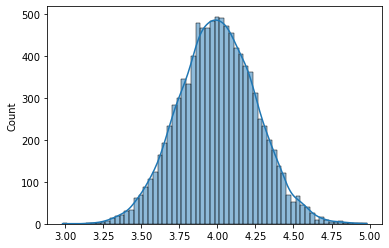

In [ ]:
sns.histplot(sample_mean_array,kde=True)

In [ ]:
# 샘플사이즈 변화
size_array = np.arange(10,100100,100)
size_array[:10]

array([ 10, 110, 210, 310, 410, 510, 610, 710, 810, 910])

In [ ]:
sample_mean_array_size = np.zeros(len(size_array))
len(sample_mean_array_size)

1001

In [ ]:
# 샘플사이즈를 변화시키면서 표본평균을 도출하는 시뮬레이션
np.random.seed(1)
for i in range(0,len(size_array)):
    sample = population.rvs(size=size_array[i])
    sample_mean_array_size[i] = np.mean(sample)
sample_mean_array_size[990:]

array([3.99954467, 4.00115947, 4.00311652, 3.99975072, 3.99989178,
       3.99777706, 3.99881193, 3.99936965, 3.99778023, 3.99851887,
       3.99990764])

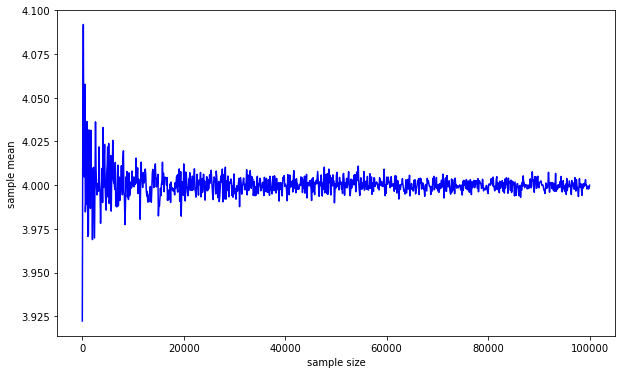

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(size_array, sample_mean_array_size, color='b')
plt.xlabel('sample size')
plt.ylabel('sample mean')
plt.show()

In [ ]:
# 사용자 함수(표본평균 계산) 
def cal_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(n_trial):
        sample_mean_array[i] = population.rvs(size=size).mean()
    return sample_mean_array
np.mean(cal_sample_mean(size=10,n_trial=10000))

3.9970521353040107

#### 과제2_0411.
상기 사용자 함수를 사용하여 샘플사이즈가 10, 20, 30이고 샘플갯수가 각각 10000개인 3개의 데이터프레임을 생성 후 결합한 후 바이올린 플롯을 그려서 인사이트를 기술하세요.


In [ ]:
# 정규분포의 확률밀도 계산

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

stats.norm.pdf(loc=4, scale=0.8, x=4) # probability density function

0.49867785050179086

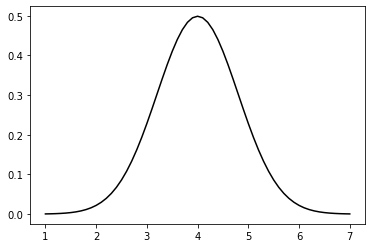

In [ ]:
x_plot = np.arange(1,7.1,0.1)
plt.plot(x_plot,stats.norm.pdf(x=x_plot,loc=4,scale=0.8),color='black')
plt.show()

In [ ]:
# Q. 동일 확률밀도 함수에서 x=3일때의 확률을 구하세요.
norm_dist= stats.norm(loc=4,scale=0.8)
norm_dist.pdf(x=3)

0.2283113567362774

stats.norm.cdf는 
- SciPy 라이브러리에서 제공하는 함수 중 하나로, 정규분포의 누적분포함수(Cumulative Distribution Function, CDF) 값을 계산하는 함수입니다. 
- 정규분포의 누적분포함수는 특정 값보다 작거나 같은 확률을 나타내는데, 이를 통해 특정 값의 분위수를 계산할 수 있습니다.

- stats.norm.cdf(x, loc=0, scale=1) 형태로 사용하며, x는 계산하고자 하는 분위수를 나타내는 값입니다. 
- loc는 정규분포의 평균값을, scale은 정규분포의 표준편차를 나타냅니다. 
- loc와 scale은 기본값으로 각각 0과 1이 지정되어 있으며, 이 경우는 표준정규분포를 가정합니다.

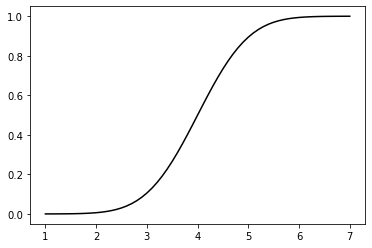

In [ ]:
# 누적분포함수
x_plot = np.arange(1,7.1,0.1)
plt.plot(x_plot,stats.norm.cdf(x=x_plot, loc=4, scale=0.8), color='black') # cumulative distribution function
plt.show()

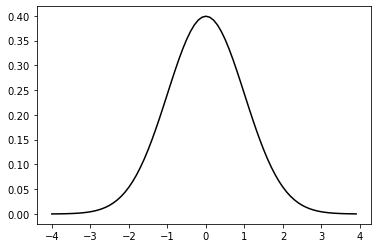

In [ ]:
x_plot = np.arange(-4,4,0.1)
plt.plot(x_plot,stats.norm.pdf(x=x_plot, loc=0, scale=1), color='black') 

In [ ]:
stats.norm.pdf(x=0)

0.3989422804014327

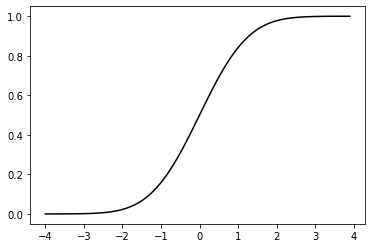

In [ ]:
x_plot = np.arange(-4,4,0.1)
plt.plot(x_plot,stats.norm.cdf(x=x_plot, loc=0, scale=1), color='black') 

In [ ]:
# 하측 확률
stats.norm.cdf(x=0)

0.5

In [ ]:
# Q. 평균이 5, 표준편차가 2인 정규분포에서 3이하의 확률 계산
stats.norm.cdf(x = 3, loc = 5, scale = 2)

0.15865525393145707

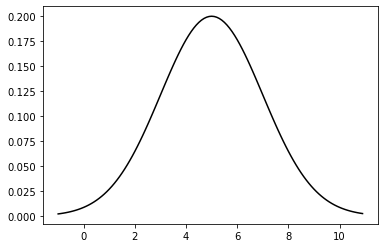

In [ ]:
x_plot=np.arange(-1,11,0.1)
plt.plot(x_plot,stats.norm.pdf(x=x_plot,loc=5,scale=2),color='black')
plt.show()

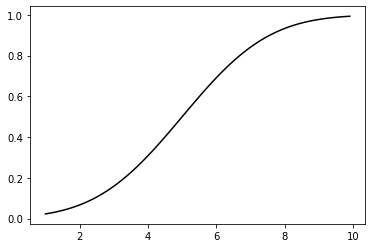

In [ ]:
x_plot=np.arange(1,10,0.1)
plt.plot(x_plot,stats.norm.cdf(x=x_plot,loc=5,scale=2),color='black')
plt.show()

stats.norm.ppf는 
- SciPy 라이브러리에서 제공하는 함수 중 하나로, 정규분포의 분위수(Percent Point Function, PPF) 값을 계산하는 함수입니다. 
- 정규분포의 분위수는 특정 확률을 가지는 값(또는 그보다 작은 값)을 계산할 수 있습니다.
- stats.norm.ppf(q, loc=0, scale=1) 형태로 사용하며, q는 계산하고자 하는 확률값을 나타내는 실수입니다. 
- loc는 정규분포의 평균값을, scale은 정규분포의 표준편차를 나타냅니다. 
- loc와 scale은 기본값으로 각각 0과 1이 지정되어 있으며, 이 경우는 표준정규분포를 가정합니다.

In [ ]:
from scipy.stats import norm
x = norm.ppf(0.8,loc=5,scale=2)
print(x)

6.683242467145829


In [ ]:
# Q. 평균 4, 표준편차 0.8이 정규분포에서 확률이 0.5일때의 분위수 값을 계산하세요.
from scipy.stats import norm
x = norm.ppf(0.5,loc=4,scale=0.8)
print(x)

4.0


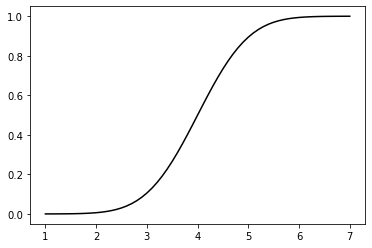

In [ ]:
x_plot = np.arange(1,7.1,0.1)
plt.plot(x_plot,stats.norm.cdf(x=x_plot, loc=4, scale=0.8), color='black')

#### 자유도
- 통계량이란, 특정한 표본에서 계산되는 어떤 수치를 말합니다. 예를 들어, 표본의 평균이나 분산 등이 통계량이 될 수 있습니다. 이때, 표본의 크기가 작아질수록 통계량을 계산할 때, 계산에 사용되는 데이터의 수가 줄어들기 때문에, 계산에 대한 제약이 더욱 커집니다.
- 통계량을 계산할 때 자유롭게 값을 지정할 수 있는 정도를 자유도(degree of freedom)라고 합니다. 자유도가 크면 큰 값, 작으면 작은 값이 나올 수 있고, 이에 따라서 추정 결과가 바뀔 수 있습니다.
- 자유도란, 통계학에서 모집단의 분포를 추정하거나 가설 검정을 할 때, 적게는 1개, 많게는 여러 개의 표본으로부터 통계량을 계산할 때, 표본의 자유도를 말합니다. 간단하게 말하면, 통계량을 계산할 때 자유롭게 값을 지정할 수 있는 정도를 의미합니다. 이는 분석하고자 하는 문제나 실험의 특성에 따라 달라지며, 모집단의 분산 추정량을 계산할 때 등 다양한 상황에서 사용됩니다.
- 어떤 학급의 수학시험에서, 20명의 학생들이 시험을 보았고, 각 학생들의 점수를 알고 있다고 가정해봅시다. 이때, 평균 점수를 계산하기 위해서는 각 학생의 점수를 모두 더한 후, 학생 수로 나누면 됩니다. 이때, 평균 점수를 계산할 때는 자유도가 n-1이 됩니다. 이는 계산에 사용되는 데이터의 수(20)에서 1을 뺀 값이기 때문입니다. 따라서, 평균 점수를 계산할 때, 각 학생의 점수를 자유롭게 지정할 수 있는 정도가 n-1만큼 되는 것입니다.
- 이와 같이, 자유도는 계산에 사용되는 데이터의 수에 따라서 결정되며, 데이터의 수가 적을수록 자유도는 작아지게 됩니다. 따라서, 작은 자유도를 가진 경우에는 계산에 대한 제약이 더욱 커지게 되므로, 이를 고려하여 적절한 분석 방법을 선택해야 합니다.

## t 분포

- 일반적으로 여러 실험을 해보면 데이터가 평균 근처에 많이 분포하고 평균에서 멀어질수록 적게 분포하는 형태를 띠는 정규분포를 띠는 경우가 많다. 그런데 정규분포는 표본의 수가 적으면 신뢰도가 낮아진다.
- 신뢰도를 높이기 위하여 표본을 많이 뽑으면 되지만 현실적으로 시간과 비용의 제약으로 한계가 있으며 이에 대한 대응책으로 정규분포보다 한 단계 예측범위가 넓은 분포를 사용하는데 바로 t분포이다.
- t분포는 정규분포의 표준정규분포처럼 표준이 되는 그래프는 없으며 대신 표본의 수에 따라서 그래프의 모양이 변하며 표본의 수가 많아질수록 점점 표준정규분포와 비슷해지고 표본의 수가 적어질수록 그래프는 점점 옆으로 퍼진다.
- t분포는 확률을 구하는 경우 보다는 신뢰구간 혹은 가설 검정에 주로 사용하는데 특히 표본의 수가 30개 미만일때 정규분포 대신 예측범위가 넓은 t분포를 사용한다. 표본의 수가 30개 이상이면 정규분포와 비슷해지기 때문에 정규분포를 사용하는 것이 바람직하다.
- t분포로 신뢰구간을 추정하고 가설검정을 할 때 t값을 알아야 하는데 t값은 x축 좌표이다.
- t-값은 t-분포에서의 값으로, 일반적으로 표본 평균과 모집단 평균의 차이를 표준 오차로 나눈 값입니다. t-값은 표본에서 계산된 통계량으로, 이를 바탕으로 모집단의 특성에 대한 가설을 검증하고, 모집단에 대한 추론을 수행
- t-값은 해당 표본이 모집단과 얼마나 다른지, 혹은 모집단과 유사한지 등을 파악하는 데 사용됩니다. t-값이 크다는 것은 표본과 모집단이 서로 매우 다르다는 것을 의미하며, 이 경우에는 해당 표본이 모집단을 대표하지 못할 가능성이 높습니다. 반면, t-값이 작다는 것은 표본과 모집단이 서로 유사하다는 것을 의미하며, 이 경우에는 해당 표본이 모집단을 대표할 가능성이 높습니다.
-  t-값은 가설 검정에서 중요한 역할을 합니다. 예를 들어, 표본을 사용하여 모집단의 평균이 어떤 값과 차이가 있는지를 검정할 때, t-값을 사용하여 가설 검정을 수행합니다. 이를 통해, 모집단에 대한 가설이 기각되는 경우, 해당 모집단과 표본 간에 차이가 있다는 것을 의미하며, 가설이 채택되는 경우, 해당 모집단과 표본 간에 차이가 없다는 것을 의미합니다.

t분포는 
- 통계학에서 가설 검정과 신뢰구간 추정에 사용되는 분포입니다. t분포는 정규분포와 유사하지만, 표본의 크기가 작은 경우에도 정확한 검정 결과를 얻을 수 있도록 고안된 분포입니다. 표본의 크기가 커질수록 t분포는 정규분포에 수렴하게 됩니다.
- t분포를 사용하는 이유는 크게 두 가지로 나뉩니다. 첫째, 표본의 크기가 작은 경우에도 정확한 검정 결과를 얻을 수 있습니다. 둘째, 모집단의 분산을 알지 못하는 경우에도 검정을 할 수 있습니다. 모집단의 분산을 알지 못할 때는 t분포를 이용하여 검정을 하며, 이 경우에는 검정통계량에 대한 검정력이 낮아질 수 있습니다.
- 아래는 t분포를 사용하는 예시입니다.
  - 어떤 연구자가 두 가지 신약의 효과를 비교하고자 할 때, 두 신약을 각각 10명의 환자에게 투여하고 그 결과를 비교하였다고 가정해봅시다. 이 경우, 각각의 신약에 대한 효과를 비교하기 위해서는 t-검정(t-test)을 사용할 수 있습니다. t-검정은 두 집단의 평균값이 서로 다른지를 검정하는 방법으로, 검정통계량 t를 계산하여 유의수준(alpha)과 비교하여 검정을 수행합니다. 
  - 만약 검정결과 t값이 양의 값이라면, 첫 번째 집단의 평균값이 더 크다는 것을 의미하며, 음의 값이라면 두 번째 집단의 평균값이 더 크다는 것을 의미합니다. 검정통계량 t는 자유도(n-1)을 가진 t분포를 따르게 됩니다. 따라서, 이 경우 t분포를 이용하여 검정통계량 t에 대한 유의확률(p-value)을 계산할 수 있습니다.

이와 같은 방식으로, t분포를 이용하여 작은 표본의 경우에도 정확한 검정 결과를 얻을 수 있으며, 모집단의 분산을 알지 못하는 경우에도 검정을 할 수 있습니다.

#### 과제1_0417.
다음 사례에서 두 가지 신약의 효과를 비교하기 위하여 t검정을 수행하세요.

- 어떤 연구자가 두 가지 신약의 효과를 비교하고자 할 때, 두 신약을 각각 10명의 환자에게 투여하고 그 결과를 비교하였다.
- X1 = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], X2 = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
- 유의수준 0.05

귀무가설 : 두 신약의 효과는 차이가 없다(두 집단의 평균값의 차이는 0이다)

대립가설 : 두 신약의 효과는 차이가 있다(두 집단의 평균값의 차이는 0이 아니다)

In [ ]:
import numpy as np
from scipy.stats import t

# X1과 X2의 데이터를 입력합니다.
X1 = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
X2 = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

# 각 집단의 평균값과 표준편차를 계산합니다.
mean_X1 = np.mean(X1)
mean_X2 = np.mean(X2)
std_X1 = np.std(X1, ddof=1)
std_X2 = np.std(X2, ddof=1)

# t-검정을 수행하기 위한 변수를 계산합니다.
# pooled standard deviation(합동 표준편차)는 t-검정에서 두 집단의 표준편차를 통합하는 방법 중 하나입니다. 
# 두 집단의 표본 표준편차가 서로 비슷하다는 가정 하에, 두 집단의 표준편차를 통합하여 하나의 표준편차로 계산
N1 = len(X1)
N2 = len(X2)
dof = N1 + N2 - 2
pooled_std = np.sqrt(((N1 - 1) * std_X1 ** 2 + (N2 - 1) * std_X2 ** 2) / dof)
t_statistic = (mean_X1 - mean_X2) / (pooled_std * np.sqrt(1 / N1 + 1 / N2))

# 유의수준을 0.05로 설정하고, 양측 검정을 수행합니다.
alpha = 0.05
t_critical = t.ppf(1 - alpha / 2, dof)

# 검정 결과를 출력합니다.
if abs(t_statistic) > t_critical:
    print("검정 결과 : 두 집단의 평균값은 서로 다릅니다.")
else:
    print("검정 결과 : 두 집단의 평균값은 서로 같습니다.")


검정 결과 : 두 집단의 평균값은 서로 같습니다.


#### 과제2_0417.
위 사례에서 두 가지 신약의 효과를 비교하기 위하여 p값으로 검정을 수행하세요.

In [ ]:
from scipy.stats import ttest_ind

# X1과 X2의 데이터를 입력합니다.
X1 = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
X2 = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

# t-검정을 수행합니다.
t_statistic, p_value = ttest_ind(X1, X2)

# 유의수준을 0.05로 설정하고, 양측 검정을 수행했다고 가정합니다.
alpha = 0.05

# 검정 결과를 출력합니다.
if p_value < alpha:
    print("검정 결과 : 두 집단의 평균값은 서로 다릅니다.")
else:
    print("검정 결과 : 두 집단의 평균값은 서로 같습니다.")

검정 결과 : 두 집단의 평균값은 서로 같습니다.


In [ ]:
# t-value는 일반적으로 표본 평균과 모집단 평균의 차이를 표준 오차로 나눈 값으로 계산
from scipy import stats

sample_data = [2.3, 3.5, 1.8, 4.1, 2.7]
sample_mean = sum(sample_data) / len(sample_data)  # 표본 평균 계산
sample_std = stats.tstd(sample_data)  # 표본 표준편차 계산
pop_mean = 3.0  # 모집단 평균 가정
t_value = (sample_mean - pop_mean) / (sample_std / len(sample_data)**0.5)
t_value

-0.2907009498669058

In [ ]:
# t값의 표본분포
from scipy import stats
import numpy as np
np.random.seed(1)
t_value_array = np.zeros(10000)
norm_dist = stats.norm(loc=4,scale=0.8)
for i in range(0,10000):
    sample = norm_dist.rvs(size=10)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample,ddof=1)
    sample_se = sample_std/np.sqrt(len(sample))
    t_value_array[i] = (sample_mean - 4)/sample_se

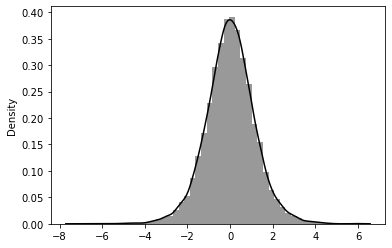

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(t_value_array,color='black')

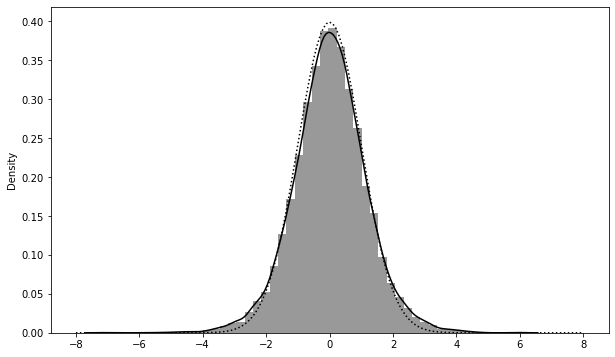

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.distplot(t_value_array,color='black')
x = np.arange(-8,8.1,0.1)
plt.plot(x,stats.norm.pdf(x=x,loc=0,scale=1),
        color='black', linestyle='dotted')

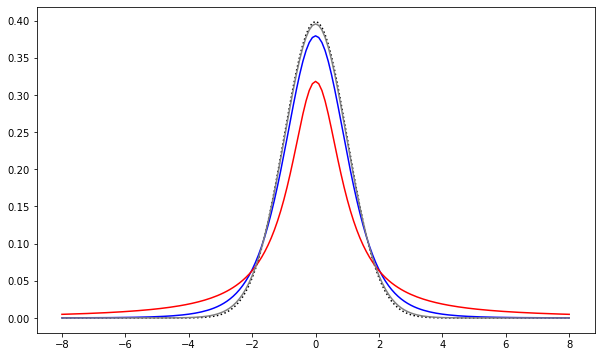

In [ ]:
# 자유도 n이 커짐에 따라 표준정규분포 N(0,1)에 수렴
plt.figure(figsize=(10,6))
plt.plot(x,stats.norm.pdf(x=x),
        color='black',linestyle='dotted')
plt.plot(x,stats.t.pdf(x=x,df=5),
        color='blue')
plt.plot(x,stats.t.pdf(x=x,df=1),
        color='red')
plt.plot(x,stats.t.pdf(x=x,df=30),
        color='gray')
plt.show()

#### 과제1_0412.
pdf, cdf, ppf를 활용하여 확률과 분위수를 구하는 사례를 작성하여 그 결과를 값과 그래프(확률밀도함수, 누적분포함수)로 출력하세요

#### 과제2_0412.
t분포의 자유도를 5개로 조정하면서 그래프의 모습이 표준 정규 분포 대비 어떻게 변하는지를 확인할 수 있는 그래프를 출력하세요.

#### 통계적 추정 : 모수 즉 모집단의 파라미터를 추정
- 모집단 분포가 정규분포임을 가정했을 때 모수를 알면 모집단 분포를 추정할 수 있음
- 점추정 : 모수를 어느 1개의 값으로 추정하는 방법
 - 모평균 추정에 표본평균을 사용하는데 표본평균은 불편성과 일치성을 가지고 있는 통계량이기 때문임
 - 모분산의 점추정값으로 표본에서 계산된 통계량으로 불편분산을 사용
- 구간추정 : 추정값이 폭을 가지게 하는 추정 방법. 추정의 폭 계산에는 확률의 개념을 사용
 - 폭을 가지므로 추정오차를 가미할 수 있으며 추정오차가 작으면 구간 추정의 폭이 좁아짐.
 - 샘플사이즈가 커져도 구간 추정의 폭은 좁아짐
- 신뢰계수(신뢰수준)와 신뢰구간
 - 신뢰계수란 구간 추정의 폭에 대한 신뢰 정도를 확률로 표현한 것. 95%, 99%
 - 신뢰구간이란 특정 신뢰계수를 만족하는 구간
 - 신뢰계수가 클수록 신뢰구간의 폭이 넓어짐
- 신뢰한계 : 신뢰구간의 하한값과 상한값
- 신뢰구간 계산 : "(표본평균 - 모평균) / 표준오차"로 계산한 t값. 구간추정을 할 때는 t분포의 퍼센트포인트 사용
 - 신뢰계수를 95%라고 했을 때 t분포를 따른다면 2.5% 지점과 97.5% 지점을 계산. 
 - t분포를 따르는 변수가 이 구간에 들어갈 확률은 95%가 됨
 - 표본의 분산 크기가 커지면 신뢰구간의 폭이 넓어짐
 - 샘플수가 커지면 자유도가 커지고 표준오차가 작아짐
 - 신뢰계수가 커질수록 안전해진다고 볼 수 있으며 신뢰구간의 폭이 넓어짐

예를 들어, 100명의 학생들의 키를 측정하여 표본평균을 계산하였습니다. 이 때, 표본의 크기는 100이며, 표본평균은 170cm입니다. 이러한 데이터를 바탕으로 모집단의 평균을 추정하고자 합니다. 이 때, 신뢰구간을 이용하여 추정값의 신뢰도를 평가할 수 있습니다.

먼저, 신뢰수준(confidence level)을 설정합니다. 신뢰수준은 추정값이 구간 내에 존재할 확률로, 일반적으로 95%나 99%로 설정됩니다. 이번 예시에서는 신뢰수준을 95%로 설정하겠습니다.

다음으로, 표본의 크기와 분산을 이용하여 표준오차(standard error)를 계산합니다. 표준오차는 표본평균과 모집단 평균의 차이를 추정하는 데 사용되는 지표입니다. 표준오차를 계산하기 위해서는 표본평균의 표준편차(standard deviation)와 표본의 크기가 필요합니다. 이번 예시에서는 표본의 표준편차가 5cm, 표본의 크기가 100명이므로, 표준오차는 다음과 같이 계산됩니다.

표준오차 = 5 / sqrt(100) = 0.5

마지막으로, 추정값과 신뢰수준, 표준오차를 이용하여 신뢰구간을 계산합니다. 이번 예시에서는 95%의 신뢰수준을 가지고 있으므로, 신뢰구간은 다음과 같이 계산됩니다.

신뢰구간 = 추정값 ± (신뢰계수 * 표준오차)
= 170 ± (1.96 * 0.5)
= (169.02, 170.98)

즉, 95%의 신뢰수준으로 모집단의 평균을 추정할 때, 평균은 약 169.02cm부터 170.98cm까지의 범위 내에 존재할 것으로 예상됩니다.

표준오차(standard error)는 표본에서 추출된 통계량이 모집단에서의 실제 값과 얼마나 차이가 나는지를 나타내는 지표입니다. 즉, 표본 평균 등의 통계량이 얼마나 정확한지를 나타내는 값입니다.

표준오차는 다음과 같이 계산됩니다.

표준오차 = (표준편차 / √n)

여기서,

표준편차는 표본에서 추출된 값들의 분산의 제곱근입니다.
n은 표본의 크기입니다.
즉, 표준오차는 표본의 크기가 커질수록 작아지며, 분산이 작을수록 작아지는 값입니다. 또한, 모집단에서 추출된 모든 가능한 표본들을 이용해 표준오차를 계산하면 모평균과의 차이가 가장 작은 값을 얻을 수 있습니다. 따라서, 표준오차는 표본평균 등의 통계량이 얼마나 정확한지를 판단할 때 유용하게 사용됩니다.

예를 들어, 키에 대한 조사에서 100명의 표본을 추출하여 평균 키를 계산하였고, 이때 표준편차가 5cm이라면, 이 표본의 평균 키가 모평균에서 얼마나 떨어져 있는지를 나타내는 표준오차는 다음과 같습니다.

표준오차 = (5 / √100) = 0.5

따라서, 이 표본의 평균 키는 모평균에서 약 0.5cm 정도 떨어져 있다고 해석할 수 있습니다.

In [ ]:
df = pd.read_csv('./dataset/5_7_fl.csv')
df

,length
0,4.352982
1,3.735304
2,5.944617
3,3.798326
4,4.087688
5,5.265985
6,3.272614
7,3.526691
8,4.150083
9,3.736104


In [ ]:
# 모평균의 점추정
fish = df.length
mu = np.mean(fish)
round(mu,2)

4.19

In [ ]:
# 모분산의 점추정
sigma_2 = np.var(fish,ddof=1)
round(sigma_2,2)

0.68

In [ ]:
# 표준오차
sigma = np.std(fish,ddof=1)
se = sigma/np.sqrt(len(fish))
round(se,2)

0.26

In [ ]:
df = len(fish) - 1
df

9

In [ ]:
# 신뢰구간 : 신뢰수준 95%
interval = stats.t.interval(alpha=0.95, df=df, loc=mu,scale=se)
interval

(3.597010056835825, 4.777068592173221)

In [ ]:
# 표준편차를 10배로 늘려서 신뢰구간 계산
se2 = sigma*10/np.sqrt(len(fish))
stats.t.interval(alpha=0.95, df=df,loc=mu,scale=se2)

(-1.7132533521824618, 10.087332001191509)

In [ ]:
# Q. 샘플사이즈를 10배로 늘려서 신뢰구간 계산
df2=(len(fish)*10)-1
se3=sigma/np.sqrt(len(fish)*10)
stats.t.interval(alpha=0.95,df=df2,loc=mu, scale=se3)

(4.0233803082774395, 4.350698340731607)

In [ ]:
# 신뢰수준 95% vs 99%

stats.t.interval(alpha=0.99,df=df,loc=mu, scale=se)

(3.3393979149413977, 5.034680734067649)

#### z분포와 t분포에서 신뢰구간 계산 방법의 차이

z분포와 t분포는 모집단의 평균을 추정하기 위해 사용되는 확률분포입니다. 하지만, z분포는 모집단의 표준편차를 알고 있을 때, t분포는 모집단의 표준편차를 알지 못할 때 사용됩니다. 따라서, z분포는 큰 표본(일반적으로 30개 이상)에 대해서 사용되며, t분포는 작은 표본에 대해서 사용됩니다.

z분포에서 신뢰구간을 계산하는 방법은 다음과 같습니다.

신뢰구간 = (표본평균 - (z분포의 임계값 * (표준편차/√n)), 표본평균 + (z분포의 임계값 * (표준편차/√n)))

여기서,

표본평균은 표본에서 추출된 값들의 평균입니다.
z분포는 정규분포를 따르는 모집단에서, 모집단의 분산을 알고 있을 때, 표본의 크기와 신뢰 수준에 따라 사용하는 분포입니다.
임계값은 신뢰 수준과 자유도에 따라 달라지는 값을 갖습니다.
표준편차는 표본의 분산의 제곱근입니다.
n은 표본의 크기입니다.
반면, t분포에서 신뢰구간을 계산하는 방법은 다음과 같습니다.

신뢰구간 = (표본평균 - (t분포의 임계값 * (표준오차)), 표본평균 + (t분포의 임계값 * (표준오차)))

여기서,

표본평균은 표본에서 추출된 값들의 평균입니다.
t분포는 정규분포를 따르는 모집단에서, 모집단의 분산을 모르고 표본의 크기와 신뢰 수준에 따라 사용하는 분포입니다.
임계값은 신뢰 수준과 자유도에 따라 달라지는 값을 갖습니다.
표준오차는 표본의 표준편차를 이용해 계산됩니다.
즉, t분포에서는 모집단의 분산을 알지 못하기 때문에, 표본의 분산을 이용하여 표준편차를 구합니다.

#### 과제3_0412.
- 크기가 10인 표본 데이터를 생성하고 평균과 표준편차를 구하세요
- 신뢰수준을 95%로 설정하고 자유도를 계산하세요.
- 신뢰구간을 계산하고 결과를 출력하세요.

In [ ]:
import numpy as np
from scipy.stats import norm
from scipy import stats

# 표본 데이터 생성
data = np.array([1.2, 1.8, 1.6, 1.4, 1.5, 1.7, 1.9, 1.3, 1.1, 1.4])

# 표본의 크기
n = len(data)

# 표본 평균
mean = np.mean(data)

# 표준 오차
std = np.std(data, ddof=1)
se = std/np.sqrt(len(data))

# 신뢰수준
conf_level = 0.95

# 자유도
df = n - 1

# 신뢰구간 계산
conf_int = stats.t.interval(alpha=0.95,df=df,loc=mean, scale=se)

# 결과 출력
print("표본 평균: {:.2f}".format(mean))
print("표본 표준편차: {:.2f}".format(std))
print("신뢰구간: {:.2f} ~ {:.2f}".format(conf_int[0], conf_int[1]))


표본 평균: 1.49
표본 표준편차: 0.26
신뢰구간: 1.30 ~ 1.68


In [ ]:
# 10배로 샘플 사이즈 확대
import numpy as np
from scipy.stats import norm

# 표본 데이터 생성
data = np.array([1.2, 1.8, 1.6, 1.4, 1.5, 1.7, 1.9, 1.3, 1.1, 1.4])

# 표본의 크기
n = len(data)*10

# 표본 평균
mean = np.mean(data)

# 표준 오차
std = np.std(data, ddof=1)
se = std/np.sqrt(len(data)*10)

# 신뢰수준
conf_level = 0.95

# 자유도
df = n - 1

# 신뢰구간 계산
conf_int = stats.t.interval(alpha=0.95,df=df,loc=mean, scale=se)

# 결과 출력
print("표본 평균: {:.2f}".format(mean))
print("표본 표준편차: {:.2f}".format(std))
print("신뢰구간: {:.2f} ~ {:.2f}".format(conf_int[0], conf_int[1]))

표본 평균: 1.49
표본 표준편차: 0.26
신뢰구간: 1.44 ~ 1.54


#### 과제4_0412.

어떤 제품을 생산하는 공장에서 제품의 길이를 측정하여 표본평균과 표본표준편차를 계산했다고 가정한다. 이때 95% 신뢰수준에서 제품의 평균 길이를 추정하기 위하여 아래의 각각의 경우에 적합한 신뢰구간을 계산하세요.
- 표본 : [49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0]
- 표본의 크기를 100배 확대

In [ ]:
import numpy as np
from scipy.stats import t

# 표본 데이터 생성
data = np.array([49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0])

# 표본의 크기
n = len(data)

# 표본 평균
mean = np.mean(data)

# 표준오차
std = np.std(data, ddof=1)
se = std/np.sqrt(len(data))

# 신뢰수준
conf_level = 0.95

# 자유도
df = n - 1

# 신뢰구간 계산
conf_int = t.interval(conf_level, df, loc=mean, scale=se)

# 결과 출력
print("표본 평균: {:.2f}".format(mean))
print("표본 표준편차: {:.2f}".format(std))
print("신뢰구간: {:.2f} ~ {:.2f}".format(conf_int[0], conf_int[1]))


표본 평균: 50.14
표본 표준편차: 0.49
신뢰구간: 49.79 ~ 50.49


In [ ]:
import numpy as np
from scipy.stats import t

# 표본 데이터 생성
data = np.array([49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0])

# 표본의 크기
n = len(data)*100

# 표본 평균
mean = np.mean(data)

# 표준오차
std = np.std(data, ddof=1)
se = std/np.sqrt(len(data)*100)

# 신뢰수준
conf_level = 0.95

# 자유도
df = n - 1

# 신뢰구간 계산
conf_int = t.interval(conf_level, df, loc=mean, scale=se)

# 결과 출력
print("표본 평균: {:.2f}".format(mean))
print("표본 표준편차: {:.2f}".format(std))
print("신뢰구간: {:.2f} ~ {:.2f}".format(conf_int[0], conf_int[1]))

표본 평균: 50.14
표본 표준편차: 0.49
신뢰구간: 50.11 ~ 50.17


신뢰구간을 구할 때, 정규분포와 t분포를 적용하는 방법은 다음과 같습니다.

- 모집단의 표준편차를 알고 있는 경우
만약 모집단의 표준편차를 알고 있다면, 표본의 크기가 작을 경우에는 t분포를 사용하지만, 표본의 크기가 충분히 크다면 정규분포를 사용하여 신뢰구간을 구할 수 있습니다. 이 때, 신뢰수준(confidence level)에 따라서 z값 또는 t값을 계산하여 신뢰구간을 구합니다.

- 모집단의 표준편차를 모르는 경우
만약 모집단의 표준편차를 모르는 경우, 표본의 크기가 작은 경우에는 t분포를 사용하여 신뢰구간을 구합니다. 이 때, 신뢰수준과 자유도(degree of freedom)에 따라서 t값을 계산하여 신뢰구간을 구합니다. 자유도는 표본의 크기에서 1을 뺀 값입니다.

예를 들어, 표본의 크기가 10인 경우, t분포를 사용하여 신뢰구간을 계산하고, 표본의 크기가 30 이상인 경우에는 정규분포를 사용하여 신뢰구간을 계산하는 것이 일반적입니다.

In [ ]:
# 모집단의 표준편차를 알고 있는 경우
import numpy as np
from scipy.stats import norm, t

# 표본 데이터 생성
data = np.array([49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0])

# 표본의 크기
n = len(data)

# 표본 평균
mean = np.mean(data)

# 모집단의 표준편차
pop_std = 0.5

# 신뢰수준
conf_level = 0.95

# z값 계산
# 정규분포에서 어떤 확률값(누적확률분포)에 해당하는 z-score(표준편차 단위의 값)를 계산
z_val = norm.ppf((1 + conf_level) / 2) 

# 신뢰구간 계산
conf_int = (mean - z_val * pop_std / np.sqrt(n), mean + z_val * pop_std / np.sqrt(n))

# 결과 출력
print("표본 평균: {:.2f}".format(mean))
print("신뢰구간: {:.2f} ~ {:.2f}".format(conf_int[0], conf_int[1]))


표본 평균: 50.14
신뢰구간: 49.83 ~ 50.45


In [ ]:
from scipy.stats import norm

# 정규분포에서 95%의 구간을 구하기 위해 z-score를 계산합니다.
z = norm.ppf(0.975)

# z-score 출력
print(z)


1.959963984540054


In [ ]:
# 모집단의 표준편차를 모르는 경우
import numpy as np
from scipy.stats import t

# 표본 데이터 생성
data = np.array([49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0])

# 표본의 크기
n = len(data)

# 표본 평균
mean = np.mean(data)

# 표본 표준편차
std = np.std(data, ddof=1)

# 신뢰수준
conf_level = 0.95

# 자유도
df = n - 1

# t값 계산
# t-분포에서 어떤 확률값(누적확률분포)에 해당하는 t-score(표준편차 단위의 값)를 계산
t_val = t.ppf((1 + conf_level) / 2, df)

# 신뢰구간 계산
conf_int = (mean - t_val * std / np.sqrt(n), mean + t_val * std / np.sqrt(n))

# 결과 출력
print("표본 평균: {:.2f}".format(mean))
print("표본 표준편차: {:.2f}".format(std))
print("신뢰구간: {:.2f} ~ {:.2f}".format(conf_int[0], conf_int[1]))


표본 평균: 50.14
표본 표준편차: 0.49
신뢰구간: 49.79 ~ 50.49


In [ ]:
from scipy.stats import t

# t-분포에서 95%의 구간을 구하기 위해 t-score를 계산합니다.
t_score = t.ppf(0.975, 9)

# t-score 출력
print(t_score)


2.2621571627409915
